In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name="mnist_784")

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
data = mnist.data
labels = mnist.target

In [ ]:
data.shape

(70000, 784)

In [ ]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt

def viz(test_img, test_label, size=(28,28)):
  plt.imshow(test_img.reshape(size[0], size[1]), cmap="Greys")
  plt.axis('off')
  plt.title(str(test_label))
  plt.show()

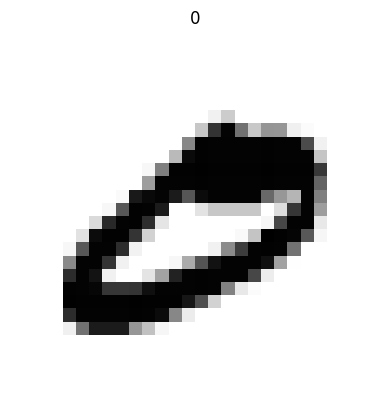

In [ ]:
import numpy as np

choice = np.random.choice(np.arange(data.shape[0]+1))
#kep valasztas
test_img = data.iloc[choice].values
#cimke valasztas
test_label = mnist.target.iloc[choice]
viz(test_img, test_label)

In [ ]:
def normalize(x):
  return (x - np.min(x)) / (np.max(x) - np.min(x))

In [ ]:
n_data = normalize(data.values)
n_data.shape

(70000, 784)

In [ ]:
def one_hot_encode(x, num_labels):
  return np.eye(num_labels)[x]

In [ ]:
train_test_split_no = int(n_data.shape[0] * 0.8)
train_test_split_no

56000

In [ ]:
X_train = n_data[:train_test_split_no]
y_train = labels[:train_test_split_no].values.astype(int)
y_train = one_hot_encode(y_train, 10)

X_train.shape, y_train

((56000, 784),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
X_test = n_data[train_test_split_no:]
y_test = labels[train_test_split_no:].values.astype(int)
y_test = one_hot_encode(y_test, 10)

X_test.shape, y_test

((14000, 784),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input((X_train.shape[1])),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for layer in model.get_weights():
  print(layer.shape)

(784, 128)
(128,)
(128, 10)
(10,)


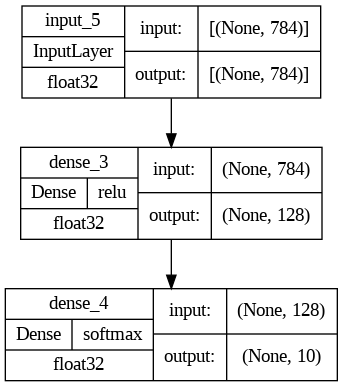

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
x = tf.ones((3, X_train.shape[1]))
model(x)

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.10754264, 0.14489308, 0.10309983, 0.0444668 , 0.03136985,
        0.20207976, 0.03102296, 0.2589279 , 0.0344566 , 0.04214057],
       [0.10754264, 0.14489308, 0.10309983, 0.0444668 , 0.03136985,
        0.20207976, 0.03102296, 0.2589279 , 0.0344566 , 0.04214057],
       [0.10754264, 0.14489308, 0.10309983, 0.0444668 , 0.03136985,
        0.20207976, 0.03102296, 0.2589279 , 0.0344566 , 0.04214057]],
      dtype=float32)>

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1750/1750 [==============================] - 9s 4ms/step - loss: 0.2704 - accuracy: 0.9230
Epoch 2/5
1750/1750 [==============================] - 8s 4ms/step - loss: 0.1185 - accuracy: 0.9647
Epoch 3/5
1750/1750 [==============================] - 7s 4ms/step - loss: 0.0815 - accuracy: 0.9756
Epoch 4/5
1750/1750 [==============================] - 9s 5ms/step - loss: 0.0603 - accuracy: 0.9812
Epoch 5/5
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0474 - accuracy: 0.9855


In [ ]:
model.evaluate(X_test, y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9772


[0.07872361689805984, 0.9772142767906189]

In [ ]:
choice = np.random.choice(np.arange(X_test.shape[0]+1))
p = model.predict(np.array([X_test[choice]]))
viz(X_test[choice], np.argmax(p))